In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal, ROUND_HALF_UP

import warnings
warnings.filterwarnings('ignore')
import time

In [2]:
train_data=pd.read_csv('./input/train.csv')
test_data=pd.read_csv('./input/test.csv')
passengerId=test_data['PassengerId']
combine=[train_data,test_data]

In [3]:
pd.unique(train_data['SibSp'])

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 数据探索

#### 查看数据的基本信息
    
    我们可以看到训练数据中的 Age，Cabin,Embarked 存在缺失值
    
    训测试据中的 Age，Cabin,Fare 存在缺失值

In [6]:
train_data.info()
print('**'*20)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### df.describe(include=['O']) 可以帮我们计算出非数字列的一些内容

In [8]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Nasser, Mr. Nicholas",male,CA. 2343,G6,S
freq,1,577,7,4,644


### 接下来探索特征和存活率之间的关系
    
    as_index=False 时会自动创建index，否则使用第一列作为index

__Sex__ 和 __Survived__ 之间的关系

In [9]:
train_data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


__Pclass__ 和 __Survived__ 之间的关系

In [10]:
train_data.groupby(['Pclass'],as_index=False)['Pclass','Survived'].mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


__SibSp__ 和 __Survived__ 之间的关系

In [11]:
train_data.groupby(['SibSp'],as_index=False)['SibSp','Survived'].mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


__Parch__ 和 __Survived__ 之间的关系

In [12]:
train_data.groupby(['Parch'],as_index=False)['Parch','Survived'].mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### 可视化展示特征和Surviced之间的关系

__Sex__ 和 __Survived__ 之间的关系展示图

    .plot.bar() 这里我们不能将as_index设为False 了

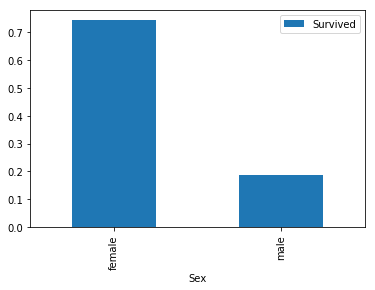

In [13]:
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

__Age__ 和 __Survived__ 的关系展示图

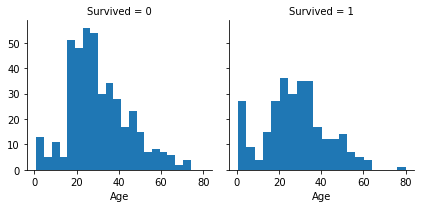

In [14]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

__Pclass__ 和 __Survived__ 的关系展示图

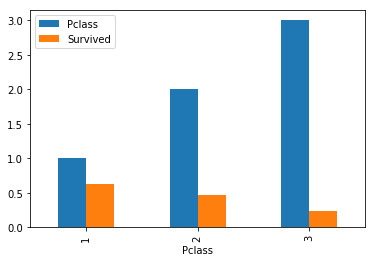

In [15]:
train_data.groupby(['Pclass'])['Pclass','Survived'].mean().plot.bar()

__Age__ __Pclass__ 和 __Survived__ 的关系展示图

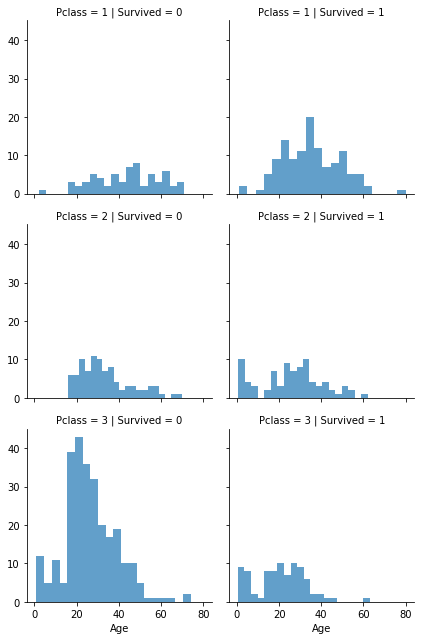

In [16]:
g=sns.FacetGrid(train_data,col='Survived',row='Pclass')
g.map(plt.hist,'Age',bins=20,alpha=.7)

__Age__ __Pclass__ __Sex__ 和 __Survived__ 的关系展示图

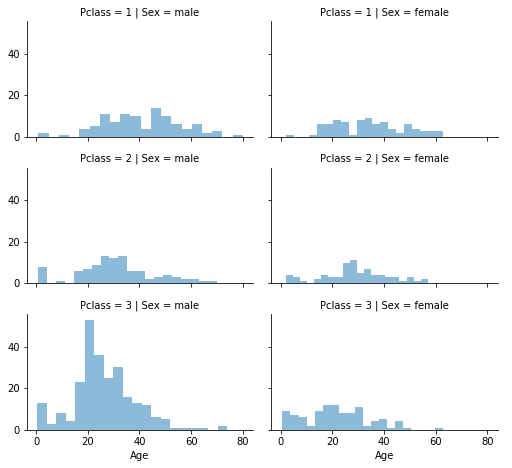

In [17]:
grid = sns.FacetGrid(train_data, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

# 特征工程

请注意，在适用的情况下，我们同时对训练和测试数据集执行操作以保持一致。

#### 因为 Cabin 的缺失值太多，Ticket 表示票号(没有意义的特征) 所以我们将这两个特征进行删除

In [18]:
print("处理前", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape)

train_data = train_data.drop(['Ticket', 'Cabin','PassengerId'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin','PassengerId'], axis=1)
combine = [train_data, test_data]

print("处理后", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape)

处理前 (891, 12) (418, 11) (891, 12) (418, 11)
处理后 (891, 9) (418, 8) (891, 9) (418, 8)


#### 接下来我们需要将名字简化成姓氏，因为我们也怀疑这个和存活率有关，因为名字基本上都不同所以如果不处理的话将会有很多噪音

   这里的 for dataset in combine 其实只是循环了两次，第一次是train_data 第二次是test_data数据，这样其实修改的就是我们train_data和test_data

In [19]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)

pd.crosstab(train_data['Title'],train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


接下来我们将语义相近的头衔进行合并,查看头衔和生存率之间存在的关系

In [20]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data.groupby(['Title'])[['Title','Survived']].mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


删除 __Name__ 这个特征

In [21]:
train_data.drop('Name',axis=1,inplace=True)
test_data.drop('Name',axis=1,inplace=True)
combine = [train_data, test_data]

#### 对性别进行编码

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data['Sex']=le.fit_transform(train_data['Sex'])
test_data['Sex']=le.fit_transform(test_data['Sex'])
combine=[train_data,test_data]
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,Mr
1,1,1,0,38.0,1,0,71.2833,C,Mrs
2,1,3,0,26.0,0,0,7.9250,S,Miss
3,1,1,0,35.0,1,0,53.1000,S,Mrs
4,0,3,1,35.0,0,0,8.0500,S,Mr


#### 接下来我们对 Age，进行分类操作，目的也是为了减小噪音，但是操作之前因为Age字段存在缺失值，我们先补充缺失值

    猜测缺失值的更准确方法是使用其他相关特征。 在我们的例子中，我们注意到Age，Sex和Pclass之间的相关性。 

In [23]:
guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [24]:
for dataset in combine:
    for i in (0,1):
        for j in range(0,3):
            no_null_age=dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age'].dropna()
            median_age=no_null_age.median()
            # 将年龄进行四舍五入转为整数
            guess_ages[i,j] = Decimal(median_age).quantize(Decimal('0'), rounding=ROUND_HALF_UP)
    for i in (0,1):
        for j in range(0,3):
            """ 这里注意 要加上 'Age' 不然定位到的是一整列进行替换了，同时Age是写在loc里面"""
            dataset.loc[(dataset['Age'].isnull()) & (dataset['Sex']==i) & (dataset['Pclass']==j+1),'Age']=guess_ages[i,j]
    dataset.Age=dataset.Age.astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22,1,0,7.2500,S,Mr
1,1,1,0,38,1,0,71.2833,C,Mrs
2,1,3,0,26,0,0,7.9250,S,Miss
3,1,1,0,35,1,0,53.1000,S,Mrs
4,0,3,1,35,0,0,8.0500,S,Mr


接下来我们将 __Age__ 进行切分，因为我们想到达到的效果是： 是否会随着年纪的增加影响存活率，所以我们没有必要保留原来的值，保留的话恰恰会留下噪音

In [25]:
for dataset in combine:
    dataset['Agecut']=pd.cut(dataset['Age'],5)
train_data[['Agecut','Survived']].groupby(['Agecut'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Agecut,Survived
0,"(-0.08, 16.0]",0.550000
3,"(48.0, 64.0]",0.434783
2,"(32.0, 48.0]",0.412037
1,"(16.0, 32.0]",0.337374
4,"(64.0, 80.0]",0.090909


将我们切分之后数据进行编码

In [26]:
train_data['Age']=le.fit_transform(train_data['Agecut'])
test_data['Age']=le.fit_transform(test_data['Agecut'])
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Agecut
0,0,3,1,1,1,0,7.2500,S,Mr,"(16.0, 32.0]"
1,1,1,0,2,1,0,71.2833,C,Mrs,"(32.0, 48.0]"
2,1,3,0,1,0,0,7.9250,S,Miss,"(16.0, 32.0]"
3,1,1,0,2,1,0,53.1000,S,Mrs,"(32.0, 48.0]"
4,0,3,1,2,0,0,8.0500,S,Mr,"(32.0, 48.0]"


之后我们就可以将 __Agecut__ 这个特征删除了

In [27]:
train_data.drop('Agecut',axis=1,inplace=True)
test_data.drop('Agecut',axis=1,inplace=True)

combine = [train_data, test_data]

#### 接下来对 SibSp 和 Parch  进行操作
接下来我们创建一个新的 __Familysize__ 特征用于表示乘船乘客带的家属数量，从而替代 __SibSp__（泰坦尼克号上的兄弟姐妹/配偶＃） 和 __Parch__（泰坦尼克号上的父母/孩子们） 这两个特征
    
    SibSp 和 Parch 对Surviced有无关系？这里我们看到当 Familysize 值对 Survived 造成的影响好像是随机的。

In [28]:
for dataset in combine:
    dataset['Familysize']=dataset['SibSp'] +dataset['Parch'] + 1 # +1 是加上自己

train_data.groupby(['Familysize'],as_index=False)[['Familysize','Survived']].mean().sort_values(by='Familysize',ascending=True)

,Familysize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


接下来我们将 __Familysize__ 转为 是一个人乘船 还是 不是一个人乘船两类

In [29]:
for dataset in combine:
    dataset['Isalone']=0
    dataset.loc[dataset['Familysize']==1,'Isalone']=1 
    dataset.loc[dataset['Familysize']!=1,'Isalone']=0 # 不是必要的 因为之前 Isalone 已经设为 0 了
    
train_data.groupby(['Isalone'],as_index=False)[['Isalone','Survived']].mean().sort_values(by='Isalone',ascending=True)

,Isalone,Survived
0,0,0.505650
1,1,0.303538


接下来我们将 __Familysize__  __SibSp__ 和 __Parch__ 这三个特征删除，使用 __Isalone__ 替代

In [30]:
train_data = train_data.drop(['Parch', 'SibSp', 'Familysize'], axis=1)
test_data = test_data.drop(['Parch', 'SibSp', 'Familysize'], axis=1)
combine = [train_data, test_data]

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Isalone
0,0,3,1,1,7.2500,S,Mr,0
1,1,1,0,2,71.2833,C,Mrs,0
2,1,3,0,1,7.9250,S,Miss,1
3,1,1,0,2,53.1000,S,Mrs,0
4,0,3,1,2,8.0500,S,Mr,1


测试数据中 __Fare__ 存在 1个 缺失值，我们选择最常见的值进行填充

In [31]:
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].mode()[0])

接着我们将Fare划分为4个等级，目的也是为了降噪,可以试一下分为五个等级，我们的训练数据中会有一项 Farecut 的 Survived 为 Nan

In [32]:
for dataset in combine:
    dataset['Farecut']=pd.cut(dataset['Fare'],4)
    
train_data[['Farecut','Survived']].groupby(['Farecut'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Farecut,Survived
3,"(384.247, 512.329]",1.000000
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
0,"(-0.512, 128.082]",0.368113


接下来同样进行编码

In [33]:
for dataset in combine:
    dataset['Farecut']=le.fit_transform(dataset['Farecut'])

然后将 __Fare__ 替换成 划分之后的等级

In [34]:
for dataset in combine:
    dataset['Fare']= dataset['Farecut']
    
train_data[['Farecut','Survived']].groupby(['Farecut'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Farecut,Survived
3,3,1.000000
1,1,0.724138
2,2,0.666667
0,0,0.368113


删除 __Farecut__ 特征

In [35]:
train_data.drop('Farecut',axis=1,inplace=True)
test_data.drop('Farecut',axis=1,inplace=True)
combine=[train_data,test_data]

训练数据中 __Embarked__ 存在 2个 缺失值，我们选择最常见的值进行填充

In [36]:
train_data['Embarked']=train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

接下来将 __Embarked__ 和 __Title__ 替换成标签

In [37]:
for dataset in combine:
    dataset['Title'] = le.fit_transform(dataset['Title']) 
    dataset['Embarked'] = le.fit_transform(dataset['Embarked']) 

In [38]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Isalone
0,0,3,1,1,0,2,2,0
1,1,1,0,2,0,0,3,0
2,1,3,0,1,0,2,1,1
3,1,1,0,2,0,2,3,0
4,0,3,1,2,0,2,2,1


In [39]:
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Isalone
0,3,1,2,0,1,2,1
1,3,0,3,0,2,3,0
2,2,1,4,0,1,2,1
3,3,1,1,0,2,2,1
4,3,0,1,0,2,3,0


# 集成模型 & 堆叠模型

In [40]:
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [41]:
from sklearn.model_selection import KFold
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#### 定义好交叉验证函数

In [42]:
ntrain=train_data.shape[0]
ntest=test_data.shape[0]
nsplits=10
random_seed=0

cv_split =KFold(n_splits=nsplits,shuffle=False,random_state=random_seed)
# cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) 

print('ntrain: ',ntrain)
print('ntest: ',ntest)

ntrain:  891
ntest:  418


In [43]:
oof_test_skf = np.empty((nsplits, ntest))
oof_test_skf.shape

(10, 418)

In [44]:
y_train=train_data['Survived']
x_train=train_data.drop('Survived',axis=1)
x_test=test_data

### 初始化模型

In [45]:
MLA=[
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.RandomForestClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    
    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    # GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    # Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #SVM
    svm.LinearSVC(),
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    
    # Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    # Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    # Xgboost
    XGBClassifier()
    
    
]

#### df直接存储dict的结果

In [46]:
tt=pd.DataFrame(columns=['p'])
tt['p']=ensemble.AdaBoostClassifier().get_params()
tt

,p
algorithm,algorithm
base_estimator,base_estimator
learning_rate,learning_rate
n_estimators,n_estimators
random_state,random_state


In [47]:
type(train_data[['Survived']].head())

pandas.core.frame.DataFrame

In [48]:
type(train_data['Survived'].head())

pandas.core.series.Series

### 使用初始化参数，进行模型预测，查看模型的准确率

In [49]:
MLA_columns=['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare=pd.DataFrame(columns=MLA_columns)

# 1、之前这里没有加deepcopy，在 MLA_predict[MLA_name]=alg.predict(x_train) 这步中直接修改了 y_train的数据，因为之前我们的y_train也是等于train_data['Survived']
# 2、train_data[['Survived']] 和 train_data['Survived'] 输出的结果是不同的，
# type(train_data[['Survived']].head())是df，type(train_data['Survived'].head())是serise

MLA_predict=train_data[['Survived']].copy(deep=True)


for row_index,alg in enumerate(MLA):
#     print('row_index: ',row_index)
    MLA_name=alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name']=MLA_name
    ''' alg.get_params() type 是一個字典 我们将其转化为str，df行中中不能直接存储dict，字典中的每一个k,v会存储一行'''
    MLA_compare.loc[row_index,'MLA Parameters']=str(alg.get_params())
    cv_result=model_selection.cross_validate(alg,x_train,y_train,cv=cv_split)
    MLA_compare.loc[row_index,'MLA Train Accuracy Mean']=cv_result['train_score'].mean()
#     print(cv_result['test_score'])
    MLA_compare.loc[row_index,'MLA Test Accuracy Mean']=cv_result['test_score'].mean()    
    MLA_compare.loc[row_index,'MLA Test Accuracy 3*STD']=cv_result['test_score'].std()*3   
    MLA_compare.loc[row_index,'MLA Time']=cv_result['fit_time'].mean()
    
    alg.fit(x_train,y_train)
    # 因为这样我们要新建一列模型预测的数据，所以我们必须要在上面的train_data[['Survived']] 中记得这是一个双括号，
    # 否则那么我们就是在series中拼接,其实是拼不进去的
    MLA_predict[MLA_name]=alg.predict(x_train)

MLA_compare.sort_values(by='MLA Test Accuracy Mean',ascending=False,inplace=True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
4,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.841751,0.822684,0.102894,0.0708118
20,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.838758,0.820437,0.0997971,0.480412
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.828657,0.814806,0.113163,0.0754011
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.84225,0.81372,0.100801,0.511704
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.820426,0.806991,0.115003,0.0731142
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.81656,0.801411,0.0913538,0.0839961
3,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.850107,0.800262,0.104525,0.013216
19,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_cova...",0.808082,0.799176,0.12867,0.00289018
17,ExtraTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.850107,0.799151,0.104955,0.00179021
16,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.850107,0.799139,0.109487,0.00199094


In [50]:
MLA_predict.head()

,Survived,AdaBoostClassifier,BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,GaussianProcessClassifier,LogisticRegressionCV,PassiveAggressiveClassifier,RidgeClassifierCV,...,BernoulliNB,GaussianNB,LinearSVC,SVC,NuSVC,DecisionTreeClassifier,ExtraTreeClassifier,LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis,XGBClassifier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,0,0,0,0,0,1,1,1,...,1,0,1,0,1,0,0,1,1,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Algorithm')

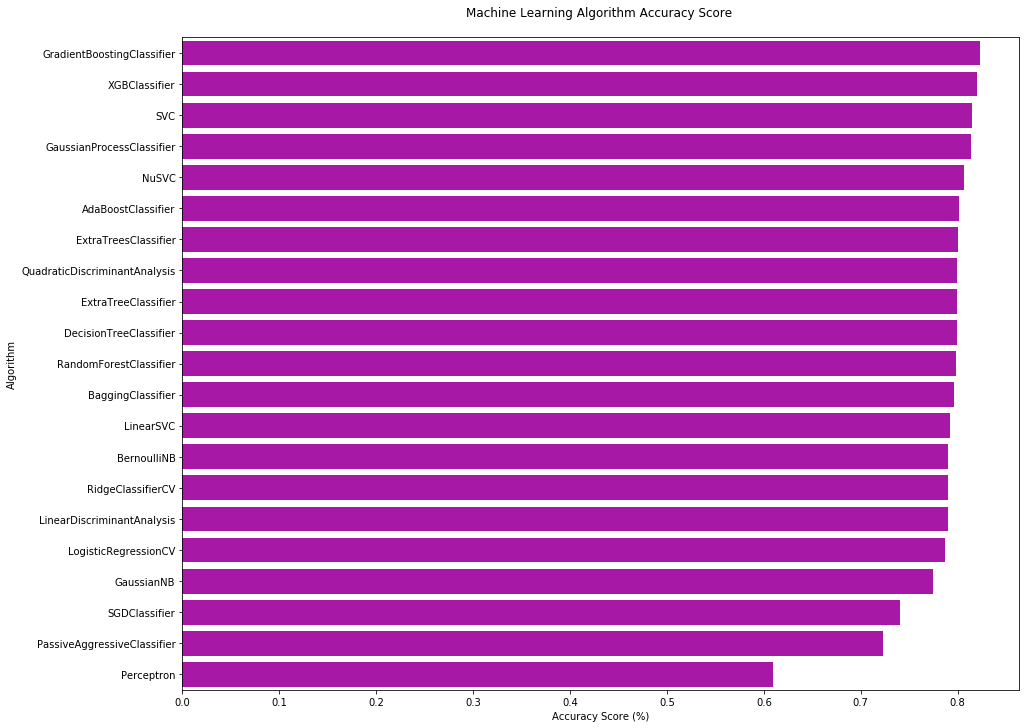

In [51]:
# 要设置sns的画布大小，要在最前面定义好plt.figure(figsize)
plt.figure(figsize=(15,12))
sns.barplot(x='MLA Test Accuracy Mean',y='MLA Name',data=MLA_compare,color='m')

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

### 通过GridSearchCV寻找最优化参数

In [52]:
dtree=tree.DecisionTreeClassifier(random_state=0)
base_results=model_selection.cross_validate(dtree,x_train,y_train,cv=cv_split)
dtree.fit(x_train,y_train)

print('BEFORE DT Parameters: ',dtree.get_params())
print('BEFORE DT Training w/bin score mean: {:.2f}'.format(base_results['train_score'].mean()*100))
print('BEFORE DT Test w/bin score mean: {:.2f}'.format(base_results['test_score'].mean()*100))
print('BEFORE DT Test w/bin score 3*std: +/- {:.2f}'.format(base_results['test_score'].std()*3))
print('\n')

param_grid={'criterion':['gini','entropy'],
            'max_depth':[2,4,6,8,10,None],
            'random_state':[0]}

tune_model=model_selection.GridSearchCV(estimator=dtree,param_grid=param_grid,scoring='roc_auc',cv=cv_split)
tune_model.fit(x_train,y_train)

print('AFTER DT Parameters: ',tune_model.best_params_)
'''[mean_train_score,mean_test_score,std_test_score] 这些键都是在 cv_results_ 中的key，
通过后面跟[tune_model.best_index_]索引我们可以得到相应key的values'''
print('AFTER DT Training w/bin score mean: {:.2f}'.format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print('AFTER DT Test w/bin score mean: {:.2f}'.format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('AFTER DT Test w/bin score 3*std: +/- {:.2f}'.format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))

BEFORE DT Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 85.01
BEFORE DT Test w/bin score mean: 80.14
BEFORE DT Test w/bin score 3*std: +/- 0.12


AFTER DT Parameters:  {'criterion': 'entropy', 'max_depth': 6, 'random_state': 0}
AFTER DT Training w/bin score mean: 89.53
AFTER DT Test w/bin score mean: 85.61
AFTER DT Test w/bin score 3*std: +/- 10.59


### 特征选择
    以DT为例进行特征选择

In [53]:
print('BEFORE DT Shape: ',x_train.shape)
print('BEFORE DT Columns: ',x_train.columns)

print('BEFORE DT Training w/bin score mean: {:.2f}'.format(base_results['train_score'].mean()*100))
print('BEFORE DT Test w/bin score mean: {:.2f}'.format(base_results['test_score'].mean()*100))
print('BEFORE DT Test w/bin score 3*std: +/- {:.2f}'.format(base_results['test_score'].std()*3))
print('\n')


dtree_rfe=feature_selection.RFECV(dtree,step=1,scoring='accuracy',cv=cv_split)
dtree_rfe.fit(x_train,y_train)

# 重要的特征会在这个特征的所在位置标志为True，不重要的标志False
x_rfe=x_train.columns.values[dtree_rfe.get_support()]
rfe_result=model_selection.cross_validate(dtree,x_train[x_rfe],y_train,cv=cv_split)

print('AFTER  DT REF Shape: ',x_train[x_rfe].shape)
print('AFTER  DT REF Columns: ',x_rfe)

print('AFTER  DT REF Training w/bin score mean: {:.2f}'.format(rfe_result['train_score'].mean()*100))
print('AFTER  DT REF Test w/bin score mean: {:.2f}'.format(rfe_result['test_score'].mean()*100))
print('AFTER  DT REF Test w/bin score 3*std: +/- {:.2f}'.format(rfe_result['test_score'].std()*3))
print('\n')


# 最优化参数
rfe_tune_model=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(),param_grid=param_grid,scoring='roc_auc',cv=cv_split)
rfe_tune_model.fit(x_train[x_rfe],y_train)

print('AFTER  DT REF Tune Shape: ',x_train[x_rfe].shape)
print('AFTER  DT REF Tune Columns: ',x_rfe)

print('AFTER  DT REF Tune Training w/bin score mean: {:.2f}'.format(rfe_tune_model.cv_results_['mean_train_score'][rfe_tune_model.best_index_]*100))
print('AFTER  DT REF Tune Test w/bin score mean: {:.2f}'.format(rfe_tune_model.cv_results_['mean_test_score'][rfe_tune_model.best_index_]*100))
print('AFTER  DT REF Tune Test w/bin score 3*std: +/- {:.2f}'.format(rfe_tune_model.cv_results_['std_test_score'][rfe_tune_model.best_index_]*100))

BEFORE DT Shape:  (891, 7)
BEFORE DT Columns:  Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'Isalone'], dtype='object')
BEFORE DT Training w/bin score mean: 85.01
BEFORE DT Test w/bin score mean: 80.14
BEFORE DT Test w/bin score 3*std: +/- 0.12


AFTER  DT REF Shape:  (891, 4)
AFTER  DT REF Columns:  ['Pclass' 'Sex' 'Embarked' 'Title']
AFTER  DT REF Training w/bin score mean: 83.18
AFTER  DT REF Test w/bin score mean: 82.72
AFTER  DT REF Test w/bin score 3*std: +/- 0.09


AFTER  DT REF Tune Shape:  (891, 4)
AFTER  DT REF Tune Columns:  ['Pclass' 'Sex' 'Embarked' 'Title']
AFTER  DT REF Tune Training w/bin score mean: 87.75
AFTER  DT REF Tune Test w/bin score mean: 86.12
AFTER  DT REF Tune Test w/bin score 3*std: +/- 2.95


In [54]:
reduce_feature=x_train[x_rfe]

In [55]:
dtree_p=rfe_tune_model.predict(x_test[x_rfe])

In [56]:
submit_data=pd.DataFrame({'passengerId':passengerId,'Survived':dtree_p})
submit_data.to_csv("StackingSubmission.csv", index=False)
submit_data[submit_data['Survived']==0].count()

passengerId    297
Survived       297
dtype: int64

### 查看模型之间的相关性
    可以定义一个热图函数

In [57]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

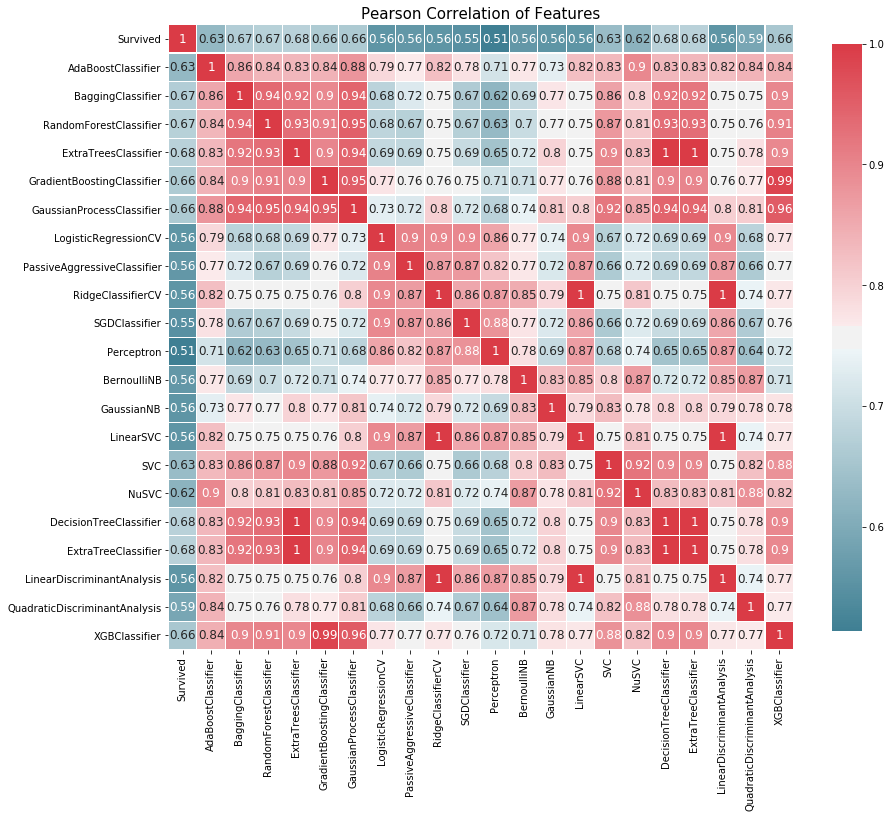

In [58]:
correlation_heatmap(MLA_predict)

#### 选择一些模型进行初始化

In [59]:
vote_est = [
    
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    #Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    #GLM: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    ('lr', linear_model.LogisticRegressionCV()),
    
    #Navies Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
    ('bnb', naive_bayes.BernoulliNB()),
    
    ## Discriminant Analysis
    ('qda', discriminant_analysis.QuadraticDiscriminantAnalysis()),
    
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    ('knn', neighbors.KNeighborsClassifier()),
    
    #SVM: http://scikit-learn.org/stable/modules/svm.html
    ('svc', svm.SVC(probability=True)),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('xgb', XGBClassifier())

]

#### 定义参数范围，使用GridSearchCV进行参数调优

In [74]:
grid_n_estimators=[1,10,50,100,300,500]
grid_ratio=[.1,.25,.50,.75,1.0]
grid_learn = [.001,.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]
grid_min_samples_leaf=[1,2,3,4,6]


grid_params=[
    [{
        # AdaboostClassifier() https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
        # The beast parameter for AdaBoostClassifier is {'learning_rate': 0.25, 'n_estimators': 50, 'random_state': 0} with runtime of 34.45 secounds
        'n_estimators': [50],
        'learning_rate': [0.25],
        # algorithm ： {'SAMME'，'SAMME.R'}，可选（默认='SAMME.R'） 选择使用什么算法
        'algorithm':['SAMME.R'],       # 'algorithm':['SAMME','SAMME.R'],
        'random_state':grid_seed
    }],
    
    [{
        # BaggingClassifier() https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
#         The beast parameter for BaggingClassifier is {'max_features': 1.0, 'max_samples': 0.75, 'n_estimators': 300, 'random_state': 0} with runtime of 176.11 secounds
        'n_estimators':[300],
        # max_samples ： int或float，optional（default = 1.0）从X中抽取的样本数量，用于训练每个基本估算器。float百分比和int样本个数
        'max_samples':[0.75],
        # 从X中绘制以训练每个基本估算器的特征数。
        'max_features':[1.0],
        'random_state':grid_seed
    }],
    
    [{
        # ExtraTreesClassifier() https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html
#       The beast parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 6, 'max_features': 1.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 0} with runtime of 473.37 secounds
        'n_estimators': [100],
        # Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 基尼系数和信息熵
        'criterion': ['entropy'],
        'max_depth': [6],
        # 最大特征个数 别超过现有特征数
        'max_features': [1.0],
        'min_samples_split': [2],
        'min_samples_leaf': [3],
        'random_state': grid_seed
    }],
    
    [{
        # GradientBoostingClassifier () https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
        # The beast parameter for GradientBoostingClassifier is 
        # {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with runtime of 336.92 secounds
#         The beast parameter for GradientBoostingClassifier is {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 0.1, 'min_samples_leaf': 3, 'n_estimators': 50, 'random_state': 0} with runtime of 0.84 secounds
        'n_estimators': [300],
        'learning_rate': [0.1],
#         'criterion':['friedman_mse','mse','mae'] , # default friedman_mse
        'max_depth': [2],      
        'random_state': grid_seed,
        'max_features': [.1],        #'max_features': [.1, .3, 1.0],
        'min_samples_leaf': [3],
    }],    
    
        [{
        # RandomForestClassifier () https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#         The beast parameter for RandomForestClassifier is {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 100, 'random_state': 0} with runtime of 111.59 secounds
        'n_estimators': [100],
#         'criterion': grid_criterion,     # default=”gini”
        'max_depth': [6],
        'random_state': grid_seed,
        'min_samples_leaf':[2],
        'max_features':['sqrt'],        # 'max_features':['sqrt','log2'],

    }],    
    
    [{
        # GaussianProcessClassifier () https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html
        # The beast parameter for GaussianProcessClassifier is {'copy_X_train': True, 'max_iter_predict': 10, 'n_restarts_optimizer': 0, 'random_state': 0, 'warm_start': True} with runtime of 153.60 secounds

        # max_iter_predict 牛顿方法中用于近似预测期间后验的最大迭代次数。较小的值将以更差的结果为代价减少计算时间。
        'max_iter_predict': [10],
        'n_restarts_optimizer':[0],
        'warm_start':[True],
        'copy_X_train':[True],
        'random_state': grid_seed
    }],    
    
    [{
        # LogisticRegressionCV - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
#         The beast parameter for LogisticRegressionCV is {'fit_intercept': True, 'max_iter': 50, 'random_state': 0, 'solver': 'saga'} with runtime of 28.37 secounds
        # fit_intercept 指定是否应将常量（也称为偏差或截距）添加到决策函数中。
        'fit_intercept': [True], #default: True
#         'penalty': ['l1','l2'],
        # solver 用于优化问题的算法。
        'solver': ['saga'], #default: lbfgs , 'solver': 'newton-cg', 'lbfgs', 'sag', 'saga']
#         'penalty': ['l1','l2','elasticnet'],
        'max_iter':[50],
#         'multi_class':['ovr','multinomial','auto'],
        'random_state': grid_seed
     }],


        [{
        # BernoulliNB - http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
        'fit_prior':grid_bool,
        # alpha （拉普拉斯/ Lidstone）平滑参数（0表示无平滑）。
        'alpha': grid_ratio, #default: 1.0
     }],


        # QuadraticDiscriminantAnalysis  
        [{}],

        [{
        #KNeighborsClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#       The beast parameter for KNeighborsClassifier is {'algorithm': 'brute', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'uniform'} with runtime of 49.16 secounds
        'leaf_size':[1],
        'n_neighbors': [5], # default: 5 默认情况下kneighbors查询使用的邻居数。
        'weights': ['uniform'], # default = ‘uniform’用于预测的权重函数 'weights': ['uniform', 'distance']
        'algorithm': ['brute'] # 用于计算最近邻居的算法：'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] 
    }],


        [{
        #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
        #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
#         The beast parameter for SVC is {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'probability': True, 'random_state': 0, 'shrinking': True} with runtime of 5.04 secounds
#         'C': [1,2,3,4,5], #default=1.0 惩罚参数
        'C': [1], #default=1.0 惩罚参数
        'gamma': grid_ratio, # default: auto 
#         'decision_function_shape': ['ovo', 'ovr'], #default:ovr
        'decision_function_shape': ['ovo'], #default:ovr
        'probability': [True], # 是否启用概率估计 default：False
        'shrinking':[True],
        'random_state': grid_seed
     }],


    [{
        #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
        # {'colsample_bytree': 1.0, 'learning_rate': 0.25, 'max_depth': 8, 'n_estimators': 100, 'seed': 0, 'subsample': 0.3} with runtime of 2127.47 secounds
        'learning_rate': [0.25], #default: .3
        'max_depth': [8], #default 2
        'n_estimators': grid_n_estimators, 
        'subsample':[.3],
        'colsample_bytree':[1.0],
        'seed': grid_seed  
     }]   
    
]

#### 寻找最优参数

In [83]:
MLA_columns2=['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare2=pd.DataFrame(columns=MLA_columns2)

# 1、之前这里没有加deepcopy，在 MLA_predict[MLA_name]=alg.predict(x_train) 这步中直接修改了 y_train的数据，因为之前我们的y_train也是等于train_data['Survived']
# 2、train_data[['Survived']] 和 train_data['Survived'] 输出的结果是不同的，
# type(train_data[['Survived']].head())是df，type(train_data['Survived'].head())是serise

MLA_predict2=train_data[['Survived']].copy(deep=True)

start_time=time.perf_counter()

for row_index,(clf,params) in enumerate(zip(vote_est,grid_params)):
    one_model_start_time=time.perf_counter()
    
    best_model=model_selection.GridSearchCV(estimator=clf[1],param_grid=params,scoring='roc_auc',cv=cv_split)
    
    """选择是否使用特征选择之后的特征"""
#     best_model.fit(x_train,y_train)
    best_model.fit(reduce_feature,y_train)

    end_time=time.perf_counter()-one_model_start_time
    best_params=best_model.best_params_
    print('The beast parameter for {} is {} with runtime of {:.2f} secounds'.format(clf[1].__class__.__name__,best_params,end_time))
    
    # *********************************************
    MLA_name=clf[1].__class__.__name__
    MLA_compare2.loc[row_index,'MLA Name']=MLA_name
    ''' alg.get_params() type 是一個字典 我们将其转化为str，df行中中不能直接存储dict，字典中的每一个k,v会存储一行'''
    MLA_compare2.loc[row_index,'MLA Parameters']=str(clf[1].get_params())
    
    """选择是否使用特征选择之后的特征"""
#     cv_result2=model_selection.cross_validate(clf[1],x_train,y_train,cv=cv_split)
    cv_result2=model_selection.cross_validate(clf[1],reduce_feature,y_train,cv=cv_split)


    MLA_compare2.loc[row_index,'MLA Train Accuracy Mean']=cv_result2['train_score'].mean()
#     print(cv_result['test_score'])
    MLA_compare2.loc[row_index,'MLA Test Accuracy Mean']=cv_result2['test_score'].mean()    
    MLA_compare2.loc[row_index,'MLA Test Accuracy 3*STD']=cv_result2['test_score'].std()*3   
    MLA_compare2.loc[row_index,'MLA Time']=cv_result2['fit_time'].mean()
    
    """选择是否使用特征选择之后的特征"""
#     clf[1].fit(x_train,y_train)
    clf[1].fit(reduce_feature,y_train)

    # 因为这样我们要新建一列模型预测的数据，所以我们必须要在上面的train_data[['Survived']] 中记得这是一个双括号，
    # 否则那么我们就是在series中拼接,其实是拼不进去的
    
    """选择是否使用特征选择之后的特征"""
#     MLA_predict2[MLA_name]=clf[1].predict(x_train)
    MLA_predict2[MLA_name]=clf[1].predict(reduce_feature)

    # **********************************************

    # 最重要的一步，设置模型参数为最优参数
    clf[1].set_params(**best_params)
    
total_time=time.perf_counter()-start_time
print('Total optimization time was {:.2f} minutes'.format(total_time/60))

MLA_compare2.sort_values(by='MLA Test Accuracy Mean',ascending=False,inplace=True)
MLA_compare2

In [78]:
new_vote_est=[
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
#     ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    #Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    #GLM: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
#     ('lr', linear_model.LogisticRegressionCV()),
    
    #Navies Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
#     ('bnb', naive_bayes.BernoulliNB()),
    
    ## Discriminant Analysis
#     ('qda', discriminant_analysis.QuadraticDiscriminantAnalysis()),
    
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
#     ('knn', neighbors.KNeighborsClassifier()),
    
    #SVM: http://scikit-learn.org/stable/modules/svm.html
    ('svc', svm.SVC(probability=True)),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('xgb', XGBClassifier())
]

#### 使用分数最高的模型单独进行预测

In [ ]:
GradientBoosting_p=vote_est[3][1].predict(x_test[x_rfe])
submit_data=pd.DataFrame({'passengerId':passengerId,'Survived':GradientBoosting_p})
submit_data.to_csv("StackingSubmission.csv", index=False)
submit_data[submit_data['Survived']==0].count()

### 投票预测

In [79]:
grid_hard = ensemble.VotingClassifier(estimators = new_vote_est , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, x_train[x_rfe],y_train, cv  = cv_split)
grid_hard.fit(x_train[x_rfe],y_train)

print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)

#Soft Vote or weighted probabilities w/Tuned Hyperparameters
grid_soft = ensemble.VotingClassifier(estimators = new_vote_est, voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, x_train[x_rfe],y_train, cv  = cv_split)
grid_soft.fit(x_train[x_rfe],y_train)

print("Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting w/Tuned Hyperparameters Training w/bin score mean: 84.42
Hard Voting w/Tuned Hyperparameters Test w/bin score mean: 81.15
Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 11.14
----------
Soft Voting w/Tuned Hyperparameters Training w/bin score mean: 84.56
Soft Voting w/Tuned Hyperparameters Test w/bin score mean: 81.26
Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 11.95
----------


#### 预测超过80%的分数的模型进行预测

In [81]:
predictions= grid_hard.predict(x_test[x_rfe])
submit_data=pd.DataFrame({'passengerId':passengerId,'Survived':predictions})
submit_data[submit_data['Survived']==0].count()

passengerId    286
Survived       286
dtype: int64

In [71]:
submit_data.to_csv("sixmodelSubmission.csv", index=False)

In [72]:
grid_hard = ensemble.VotingClassifier(estimators = vote_est  , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, x_train[x_rfe],y_train, cv  = cv_split)
grid_hard.fit(x_train[x_rfe],y_train)

print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)

#Soft Vote or weighted probabilities w/Tuned Hyperparameters
grid_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, x_train[x_rfe],y_train, cv  = cv_split)
grid_soft.fit(x_train[x_rfe],y_train)

print("Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting w/Tuned Hyperparameters Training w/bin score mean: 83.13
Hard Voting w/Tuned Hyperparameters Test w/bin score mean: 81.93
Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 11.13
----------
Soft Voting w/Tuned Hyperparameters Training w/bin score mean: 82.90
Soft Voting w/Tuned Hyperparameters Test w/bin score mean: 82.15
Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 11.72
----------


In [ ]:
data_val=np.zeros((ntest,))

In [73]:
predictions= grid_hard.predict(x_test[x_rfe])
submit_data=pd.DataFrame({'passengerId':passengerId,'Survived':predictions})
submit_data[submit_data['Survived']==0].count()

passengerId    297
Survived       297
dtype: int64

In [ ]:
submit_data.to_csv("StackingSubmission.csv", index=False)

 The beast parameter for AdaBoostClassifier is {'learning_rate': 0.05, 'n_estimators': 300, 'random_state': 0} with runtime of 39.97 secounds

 The beast parameter for BaggingClassifier is {'max_samples': 0.1, 'n_estimators': 300, 'random_state': 0} with runtime of 35.60 secounds

 The beast parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 300, 'random_state': 0} with runtime of 80.14 secounds

 The beast parameter for GradientBoostingClassifier is {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with runtime of 336.92 secounds

 The beast parameter for RandomForestClassifier is {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 300, 'random_state': 0} with runtime of 82.48 secounds

 The beast parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with runtime of 22.09 secounds

The beast parameter for LogisticRegressionCV is {'fit_intercept': True, 'random_state': 0, 'solver': 'newton-cg'} with runtime of 8.14 secounds

The beast parameter for BernoulliNB is {'alpha': 0.75} with runtime of 0.24 secounds

 The beast parameter for GaussianNB is {} with runtime of 0.05 secounds

 The beast parameter for KNeighborsClassifier is {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'} with runtime of 8.13 secounds

 The beast parameter for SVC is {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'probability': True, 'random_state': 0} with runtime of 35.65 secounds

 The beast parameter for XGBClassifier is {'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 100, 'seed': 0} with runtime of 156.16 secounds
 
Total optimization time was 32.75 minutes